<a href="https://colab.research.google.com/github/OseiasBeu/fight_project/blob/main/ufc_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da base:

## Datasets: 
 ufc_df_o -> Dataset original:
 > Linhas: 4896
 
 > Colunas: 119

 ufc_df_t -> Dataset tratado:
 > Linhas: 4896

 > Colunas: 85 (Sem campos de labels)

 > Colunas:    (Com campos de labels)


Tipos de dados contidos:
> bool(1)

> float64(58)

> int64(46)

> object(14)
--- 
## Informações sobre o evento:
- weight_class -> Categoria da luta;
- country -> País onde o evento vai acontecer;
- finish -> Forma de finalização da luta;
- finish_round -> Round de finalização da luta;
- finish_round_time -> Tempo de finalização da luta no round;
- Winner -> Corner vencedor;

--- 

## Informações sobre os lutadores:
- age -> Idade do lutador/a
- age_dif -> Diferença de idade entre os lutadores;
- Stance -> Base de luta do lutador;
- draw -> Número de empates;
- longest_win_streak -> Sequência de vitórias mais longa;
- current_win_streak -> Sequência de vitórias atual;
- current_lose_streak -> Sequência de derrotas atual;
- total_rounds_fought -> Quantidade de rounds já lutados;
- total_title_bouts -> Quantidade de lutas pelo título;
- win_by_Decision_Majority -> Vitória por decisão majoritária;
- win_by_Decision_Split -> Vitória por decisão dividida;
- win_by_Decision_Unanimous -> Vitória por decisão unânime;
- win_by_KO/TKO -> Vitória por nocaute ou nocaute técnico;
- win_by_Submission -> Vitória por submissão;
- win_by_TKO_Doctor_Stoppage -> Vitória por decisão médica;
- wins -> Quantidade de vitórias;
- Weight_lbs -> Peso do atleta em libras;
---


## Campos para remover:
- constant_1
- finish_details
- finish_round_time
- empty_arena
- date
- location
- better_rank
- R_fighter
- B_fighter
- B_odds
- R_odds
- R_ev
- B_ev
- finish
- B_Stance
- R_Stance
- gender
- winner
- country
- age_dif
- total_title_bout_dif
- ko_dif
- sub_dif
- longest_win_streak_dif
- win_dif
- loss_dif
- total_round_dif
- B_avg_SIG_STR_landed
- B_avg_SIG_STR_pct
- R_avg_SIG_STR_landed
- R_avg_SIG_STR_pct
- B_avg_SUB_ATT
- R_avg_SUB_ATT
- B_avg_TD_landed
- B_avg_TD_pct
- R_avg_TD_landed
- R_avg_TD_pct
- sig_str_dif
- avg_sub_att_dif
- avg_td_dif
- r_dec_odds
- b_dec_odds
- r_sub_odds
- b_sub_odds
- r_ko_odds
- b_ko_odds
- height_dif
- reach_dif
- title_bout

--- 

## Campos de classe: 
- Gender
> gender_t : 0 = Male; 1 = Female
- Winner 
> winner_t : 0 = Red; 1 = Blue;
- title_bout:
> title_bout_t : 0 = True; 1 = False;

---
## Campos para labels:
- country_t
- B_Stance 
- R_Stance
- better_rank
- finish ( 7 agrupamentos )


---

## Campos calculados:
- lose_streak_dif
- win_streak_dif
- longest_win_streak_dif
- win_dif
- loss_dif
- total_round_dif
- total_title_bout_dif
- ko_dif
- sub_dif
- height_dif
- age_dif
- sig_str_dif
- avg_sub_att_dif
- avg_td_dif

# Leitura do dataset:

In [182]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [183]:
ufc_df_o = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/fight_project/main/datasets/ufc-master.csv')
ufc_df_o = pd.DataFrame(ufc_df_o)

In [184]:
ufc_df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


In [185]:
ufc_df_o.shape

(4896, 119)

In [186]:
ufc_df_o.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,...,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,...,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944643,0.571515,0.769386,1.311379,0.108333,20.935885,0.121332,...,4.259763,4.300283,0.996643,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,5.610000,0.387500,...,5.000000,5.000000,1.000000,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,24.759615,0.450000,...,8.000000,10.000000,3.000000,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,126.500000,220.000000,126.500000,220.000000,3.000000,1.000000,1.000000,0.000000,39.075000,0.510000,...,12.000000,13.500000,3.000000,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000


In [187]:
ufc_df_o.head(2)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.0,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.0,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0


In [188]:
columns_arr = []
for i in ufc_df_o.columns:
  if i[0] != 'R' and i[0] != 'B' and i[0] != 'r' and i[0] != 'b':
    columns_arr.append(i)


In [189]:
columns_arr = []
for i in ufc_df_o.columns:
  if i[0] != 'R' and i[0] != 'B' and i[0] != 'r' and i[0] != 'b':
    pass
  else:
    columns_arr.append(i)


## Tipos de dados contidos no dataframe:

In [190]:
datatypes = ufc_df_o.dtypes.values
datatypes = np.unique(datatypes)

In [191]:
datatypes

array([dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')],
      dtype=object)

# Analisando campos de classes:

In [192]:
ufc_df_o.select_dtypes(include='object').describe().columns

Index(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'Winner',
       'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank',
       'finish', 'finish_details', 'finish_round_time'],
      dtype='object')

## Tratar o campo Winner

- 0 = Red; 
- 1 = Blue;

In [193]:
ufc_df_o.Winner.value_counts()

Red     2859
Blue    2037
Name: Winner, dtype: int64

In [194]:
de_para_Winner = {
    'Red': 0,
    'Blue': 1
}

ufc_df_o['winner_t'] = ufc_df_o.Winner.map(de_para_Winner)

In [195]:
ufc_df_o[['Winner','winner_t']].head(3)

,Winner,winner_t
0,Red,0
1,Blue,1
2,Blue,1


## Tratar o campo Gender

In [196]:
ufc_df_o.gender.value_counts()

MALE      4384
FEMALE     512
Name: gender, dtype: int64

In [197]:
de_para_Gender = {
    'MALE': 0,
    'FEMALE': 1
}

ufc_df_o['gender_t'] = ufc_df_o.gender.map(de_para_Gender)
ufc_df_o[['gender_t','gender']].value_counts()

gender_t  gender
0         MALE      4384
1         FEMALE     512
dtype: int64

## Tratar o campo country:

In [198]:
ufc_df_o.country.value_counts()

 USA                     2450
USA                       599
 Brazil                   400
 Canada                   337
 United Kingdom           165
 Australia                160
United Arab Emirates      141
 Sweden                    72
 Mexico                    70
 China                     61
 Germany                   54
 Japan                     53
 Singapore                 45
 Russia                    36
 New Zealand               33
 United Arab Emirates      29
 Netherlands               25
 South Korea               24
 Poland                    23
 Ireland                   19
 Croatia                   13
 Czech Republic            13
 Denmark                   13
 Chile                     13
 Uruguay                   13
 Philippines               12
 Argentina                 12
Brazil                     11
Name: country, dtype: int64

In [199]:
ufc_df_o['country_t'] = ufc_df_o.country.str.strip()

In [200]:
ufc_df_o[['country','country_t']].value_counts()

country                country_t           
 USA                   USA                     2450
USA                    USA                      599
 Brazil                Brazil                   400
 Canada                Canada                   337
 United Kingdom        United Kingdom           165
 Australia             Australia                160
United Arab Emirates   United Arab Emirates     141
 Sweden                Sweden                    72
 Mexico                Mexico                    70
 China                 China                     61
 Germany               Germany                   54
 Japan                 Japan                     53
 Singapore             Singapore                 45
 Russia                Russia                    36
 New Zealand           New Zealand               33
 United Arab Emirates  United Arab Emirates      29
 Netherlands           Netherlands               25
 South Korea           South Korea               24
 Poland             

In [201]:
ufc_df_o['finish'].value_counts()

U-DEC         1778
KO/TKO        1495
SUB            854
S-DEC          483
M-DEC           32
DQ              14
Overturned       2
Name: finish, dtype: int64

## Converter campo finish_round_time:


In [202]:
ufc_df_o[['no_of_rounds','finish_round_time','total_fight_time_secs']].head(4)

,no_of_rounds,finish_round_time,total_fight_time_secs
0,5,5:00,1500.0
1,3,5:00,900.0
2,3,5:00,900.0
3,3,1:20,80.0


In [203]:
ufc_df_o['finish_round_time_t'] = ufc_df_o.finish_round_time.str.replace(':','.')
ufc_df_o['finish_round_time_t'] = ufc_df_o["finish_round_time_t"].astype(float)
ufc_df_o[['finish_round_time','finish_round_time_t','no_of_rounds','total_fight_time_secs']].head(5)

,finish_round_time,finish_round_time_t,no_of_rounds,total_fight_time_secs
0,5:00,5.0,5,1500.0
1,5:00,5.0,3,900.0
2,5:00,5.0,3,900.0
3,1:20,1.2,3,80.0
4,5:00,5.0,3,900.0


# Analisando campos do tipo numérico:

In [204]:
ufc_df_o.select_dtypes(include='int').describe().columns

Index(['B_odds', 'no_of_rounds', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_longest_win_streak', 'B_losses',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Weight_lbs',
       'R_current_lose_streak', 'R_current_win_streak', 'R_draw',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Weight_lbs', 'R_age',
       'B_age', 'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'age_dif', 'empty_arena', 'constant_1',

## Tratar campos calculados:

### Tratar campo total_round_dif

In [205]:
ufc_df_o.total_round_dif.value_counts().head(2)

 0    497
-3    266
Name: total_round_dif, dtype: int64

### Tratar campo loss_dif

In [206]:
ufc_df_o.loss_dif.value_counts().head(2)

0    1222
1     812
Name: loss_dif, dtype: int64

### Tratar campo win_dif

In [207]:
ufc_df_o[['win_dif']].head(2)

,win_dif
0,-8
1,-5


### Tratar campo longest_win_streak_dif

In [208]:
ufc_df_o.longest_win_streak_dif.value_counts().head(2)

 0    1406
-1    1102
Name: longest_win_streak_dif, dtype: int64

### Tratar campo sub_dif

In [209]:
ufc_df_o.sub_dif.value_counts().head(2)

 0    2448
-1     812
Name: sub_dif, dtype: int64

### Tratar campo ko_dif:

In [210]:
ufc_df_o.ko_dif.value_counts().head(2)

 0    2037
-1     903
Name: ko_dif, dtype: int64

### Tratar campo title_bout

In [211]:
ufc_df_o.total_title_bout_dif.head(2)

0   -1
1    0
Name: total_title_bout_dif, dtype: int64

### Tratar campo age_dif:

In [212]:
ufc_df_o.age_dif.value_counts().head(2)

-1    384
 0    361
Name: age_dif, dtype: int64

In [213]:
ufc_df_o[['R_age','B_age','age_dif']].head(10)

,R_age,B_age,age_dif
0,37,29,-8
1,33,32,-1
2,34,32,-2
3,29,32,3
4,28,33,5
5,36,23,-13
6,38,26,-12
7,28,27,-1
8,36,29,-7
9,33,30,-3


In [214]:
ufc_df_o[['R_fighter','R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins']].head(10)

,R_fighter,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins
0,Thiago Santos,0,0,2,11,0,0,13
1,Alex Oliveira,0,1,3,4,3,0,11
2,Misha Cirkunov,0,0,0,1,5,0,6
3,Alexander Hernandez,0,0,2,2,0,0,4
4,Joe Solecki,0,0,2,0,2,0,4
5,Antonina Shevchenko,0,0,1,2,1,0,4
6,Bethe Correia,0,2,2,1,0,0,5
7,Devonte Smith,0,0,0,4,0,0,4
8,Douglas Silva de Andrade,0,0,3,1,0,0,4
9,Stephanie Egger,0,0,0,0,0,0,0


### Criar função para tratamento:

In [215]:
def aplica_abs(dataframe, arr_columns):
  arr_newColumn = []
  for column in arr_columns:
    arr_newColumn.append(column+'_t')
    dataframe[column+'_t'] = abs(dataframe[column])
  print(arr_newColumn)
  return dataframe

In [216]:
arr_columns = ['age_dif','total_title_bout_dif','ko_dif','sub_dif','longest_win_streak_dif','win_dif','loss_dif','total_round_dif']
ufc_df_o = aplica_abs(ufc_df_o, arr_columns)

['age_dif_t', 'total_title_bout_dif_t', 'ko_dif_t', 'sub_dif_t', 'longest_win_streak_dif_t', 'win_dif_t', 'loss_dif_t', 'total_round_dif_t']


In [217]:
ufc_df_o[['age_dif_t', 'total_title_bout_dif_t', 'ko_dif_t', 'sub_dif_t', 'longest_win_streak_dif_t', 'win_dif_t', 'loss_dif_t', 'total_round_dif_t']].describe()

,age_dif_t,total_title_bout_dif_t,ko_dif_t,sub_dif_t,longest_win_streak_dif_t,win_dif_t,loss_dif_t,total_round_dif_t
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,4.130515,0.610294,1.266136,0.991217,1.481209,2.815564,1.968137,11.185662
std,3.133124,1.565358,1.731533,1.479628,1.584544,3.211269,2.125627,13.807078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,3.000000,0.000000,1.000000,0.500000,1.000000,2.000000,1.000000,7.000000
75%,6.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,15.000000
max,17.000000,16.000000,21.000000,13.000000,14.000000,28.000000,18.000000,448.000000


## Analisando campos do tipo float:

In [218]:
ufc_df_o.select_dtypes(include='float64').describe().columns

Index(['R_odds', 'R_ev', 'B_ev', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct',
       'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_Height_cms',
       'B_Reach_cms', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct',
       'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_Height_cms',
       'R_Reach_cms', 'height_dif', 'reach_dif', 'sig_str_dif',
       'avg_sub_att_dif', 'avg_td_dif', 'B_match_weightclass_rank',
       'R_match_weightclass_rank', 'R_Women's Flyweight_rank',
       'R_Women's Featherweight_rank', 'R_Women's Strawweight_rank',
       'R_Women's Bantamweight_rank', 'R_Heavyweight_rank',
       'R_Light Heavyweight_rank', 'R_Middleweight_rank',
       'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank',
       'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank',
       'B_Women's Flyweight_rank', 'B_Women's Featherweight_rank',
       'B_Women's Strawweight_rank', 'B_Women's Bantamweight_rank',
       'B_Heavyweight_rank', 'B_Ligh

In [219]:
ufc_df_o.r_dec_odds.describe()

count    4093.000000
mean      294.064745
std       230.583958
min      -440.000000
25%       167.000000
50%       250.000000
75%       400.000000
max      2200.000000
Name: r_dec_odds, dtype: float64

In [220]:
ufc_df_o[['height_dif', 'reach_dif']].describe()

,height_dif,reach_dif
count,4896.000000,4896.000000
mean,0.018591,-0.251172
std,6.963455,9.433336
min,-187.960000,-187.960000
25%,-5.080000,-5.080000
50%,0.000000,0.000000
75%,5.080000,5.080000
max,30.480000,30.480000


### Tratar campos de diferença de altura e alcance:

In [221]:
columns = ['height_dif', 'reach_dif']
ufc_df_o = aplica_abs(ufc_df_o,columns)

['height_dif_t', 'reach_dif_t']


# Analisando campos do tipo bool:

In [222]:
ufc_df_o.select_dtypes(include='bool').describe().columns

Index(['title_bout'], dtype='object')

In [223]:
de_para_title_bout = {
    True: 0,
    False: 1
}

ufc_df_o['title_bout_t'] = ufc_df_o.title_bout.map(de_para_title_bout)
ufc_df_o[['title_bout','title_bout_t']].value_counts()

title_bout  title_bout_t
False       1               4660
True        0                236
dtype: int64

# Criando labels:

In [224]:
ufc_df_o.select_dtypes(include='O').describe().columns

Index(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'Winner',
       'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank',
       'finish', 'finish_details', 'finish_round_time', 'country_t'],
      dtype='object')

In [225]:
cols = ['weight_class','country_t','B_Stance','R_Stance','better_rank','finish']

print(f'Dimensão ANTES de gerar as features: {ufc_df_o.shape}')
ufc_df_o = pd.get_dummies(ufc_df_o, columns=cols)
print(f'Dimensão DEPOIS de gerar features: {ufc_df_o.shape}')

Dimensão ANTES de gerar as features: (4896, 134)
Dimensão DEPOIS de gerar features: (4896, 185)


# Limpeza no dataset:

In [227]:
ufc_df_t = ufc_df_o.drop(
    columns=['constant_1','finish_details','finish_round_time','empty_arena','date','location','R_fighter','B_fighter','B_odds','R_odds','R_ev','B_ev','gender','Winner','country','age_dif','total_title_bout_dif','ko_dif','sub_dif','longest_win_streak_dif','win_dif','loss_dif','total_round_dif','B_avg_SIG_STR_landed','B_avg_SIG_STR_pct','R_avg_SIG_STR_landed','R_avg_SIG_STR_pct','B_avg_SUB_ATT','R_avg_SUB_ATT','B_avg_TD_landed','B_avg_TD_pct','R_avg_TD_landed','R_avg_TD_pct','sig_str_dif','avg_sub_att_dif','avg_td_dif','r_dec_odds','b_dec_odds','r_sub_odds','b_sub_odds','r_ko_odds','b_ko_odds','height_dif','reach_dif','title_bout','B_match_weightclass_rank','R_match_weightclass_rank',"R_Women's Flyweight_rank","R_Women's Featherweight_rank","R_Women's Strawweight_rank","R_Women's Bantamweight_rank",'R_Heavyweight_rank','R_Light Heavyweight_rank','R_Middleweight_rank','R_Welterweight_rank','R_Lightweight_rank','R_Featherweight_rank','R_Bantamweight_rank','R_Flyweight_rank','R_Pound-for-Pound_rank',"B_Women's Flyweight_rank","B_Women's Featherweight_rank","B_Women's Strawweight_rank","B_Women's Bantamweight_rank",'B_Heavyweight_rank','B_Light Heavyweight_rank','B_Middleweight_rank','B_Welterweight_rank','B_Lightweight_rank','B_Featherweight_rank','B_Bantamweight_rank','B_Flyweight_rank','B_Pound-for-Pound_rank'],
    axis=1
    )

In [228]:
print(ufc_df_o.shape)
print(ufc_df_t.shape)

(4896, 185)
(4896, 112)


# Criando listas de variáveis alvo:

In [230]:
# columns_arr = []
# for i in ufc_df_t.columns:
#   if i[0] != 'R' and i[0] != 'B' and i[0] != 'r' and i[0] != 'b':
#     pass
#   else:
#     columns_arr.append(i)
# columns_arr

In [231]:
quem_target_list = ['winner_t']
como_target_list = ['finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC']
tempo_target_list = ['finish_round']

# Separação do dataset:

In [236]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
X = X.fillna(0)
y_winner = ufc_df_t['winner_t']
X_treino, X_teste,y_treino_winner, y_teste_winner = train_test_split(X,y_winner,test_size=0.3,random_state=7272)

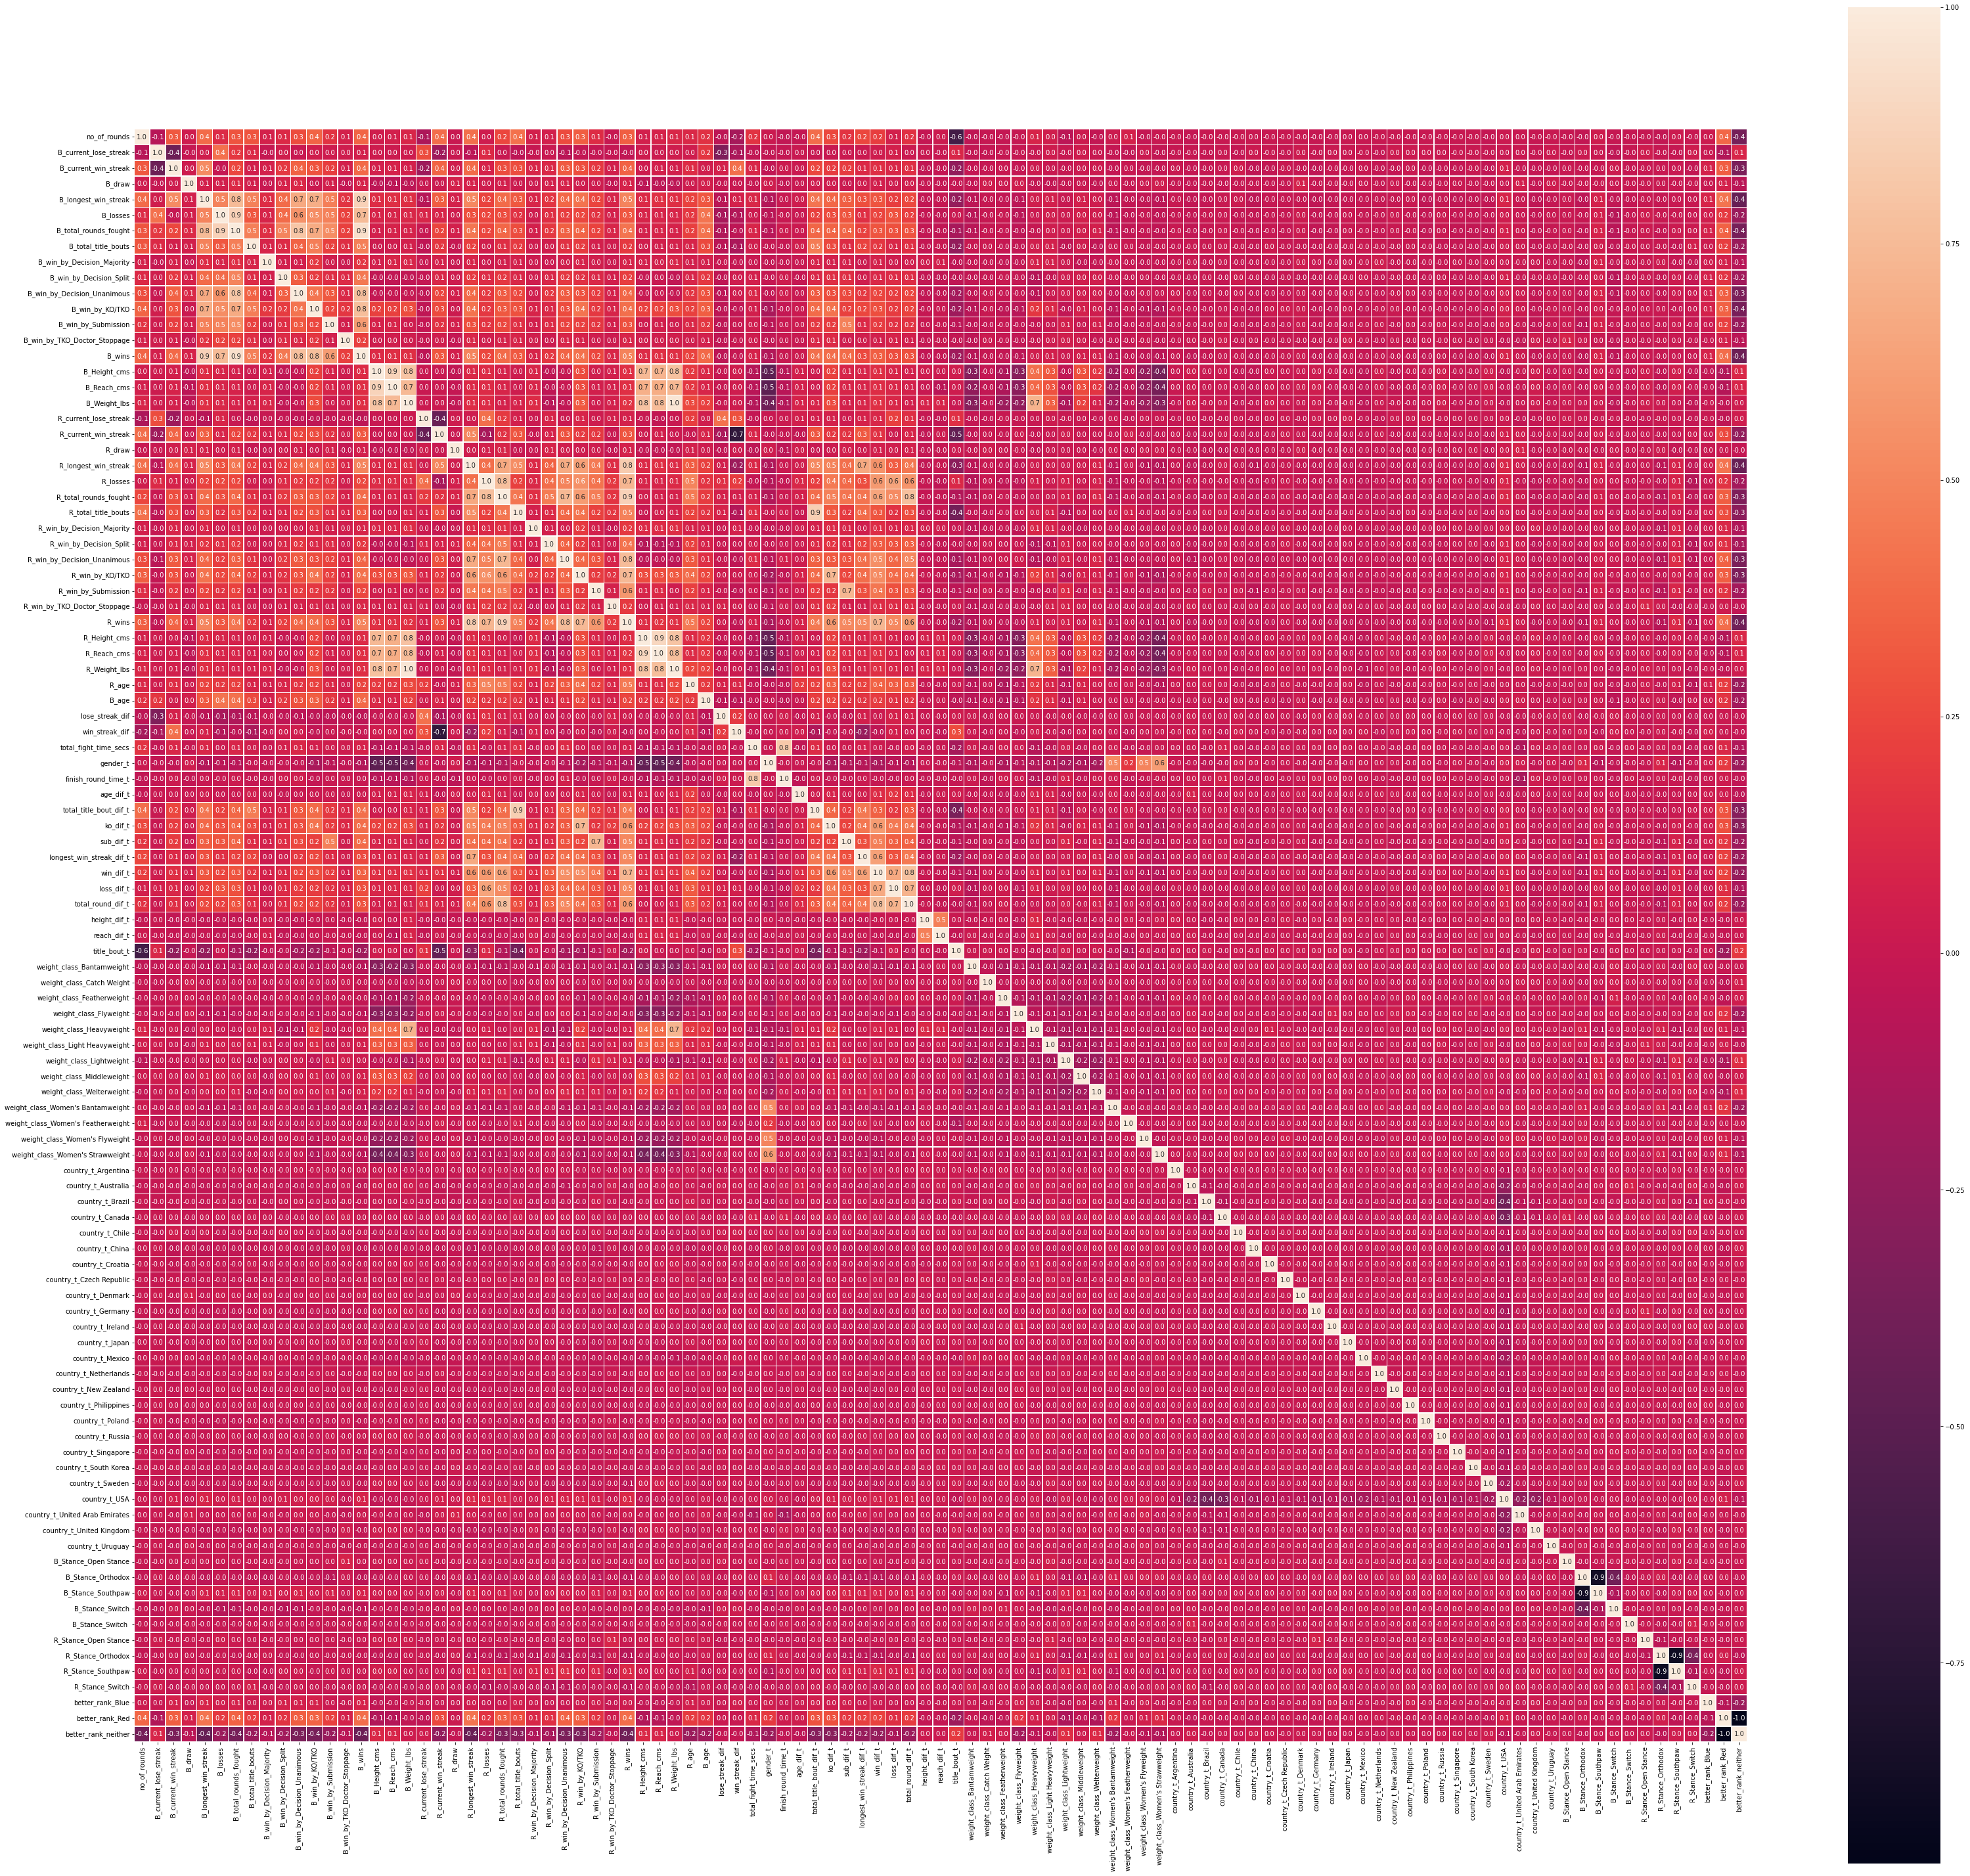

In [237]:
corr_df = X.corr(method='pearson')

plt.figure(figsize=(55, 52))
sns.heatmap(corr_df, annot=True, fmt=".1f", linewidths=.5, square=True)
plt.show()

In [165]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_DQ = ufc_df_t['finish_DQ']
X_treino, X_teste,y_treino_finish_DQ, y_teste_finish_DQ = train_test_split(X,y_finish_DQ,test_size=0.3,random_state=7272)

In [166]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_KOTKO = ufc_df_t['finish_KO/TKO']
X_treino, X_teste,y_treino_finish_KOTKO, y_teste_finish_KOTKO = train_test_split(X,y_finish_KOTKO,test_size=0.3,random_state=7272)

In [167]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_MDEC = ufc_df_t['finish_M-DEC']
X_treino, X_teste,y_treino_finish_MDEC, y_teste_finish_MDEC = train_test_split(X,y_finish_MDEC,test_size=0.3,random_state=7272)

In [168]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_Overturned = ufc_df_t['finish_Overturned']
X_treino, X_teste,y_treino_finish_Overturned, y_teste_finish_Overturned = train_test_split(X,y_finish_Overturned,test_size=0.3,random_state=7272)

In [169]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_SDEC = ufc_df_t['finish_S-DEC']
X_treino, X_teste,y_treino_finish_SDEC, y_teste_finish_SDEC = train_test_split(X,y_finish_SDEC,test_size=0.3,random_state=7272)

In [170]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_SUB = ufc_df_t['finish_SUB']
X_treino, X_teste,y_treino_finish_SUB, y_teste_finish_SUB = train_test_split(X,y_finish_SUB,test_size=0.3,random_state=7272)

In [171]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_winner_t = ufc_df_t['winner_t']
X_treino, X_teste,y_treino_winner, y_teste_winner = train_test_split(X,y_winner_t,test_size=0.3,random_state=7272)

In [172]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)
y_finish_UDEC = ufc_df_t['finish_U-DEC']
X_treino, X_teste,y_treino_finish_UDEC, y_teste_finish_UDEC = train_test_split(X,y_finish_UDEC,test_size=0.3,random_state=7272)

In [173]:
X = ufc_df_t.drop(['winner_t','finish_DQ','finish_KO/TKO','finish_M-DEC','finish_Overturned','finish_S-DEC','finish_SUB','finish_U-DEC','finish_round'],axis=1)

y_finish_round = ufc_df_t['finish_round']
X_treino, X_teste,y_treino_finish_round, y_teste_finish_round = train_test_split(X,y_finish_round,test_size=0.3,random_state=7272)

# Aplicação do modelo: [QUEM?]

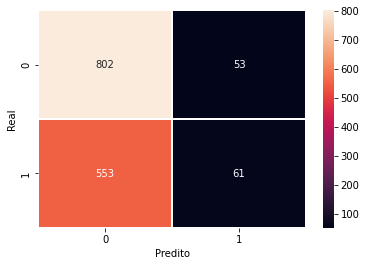

In [242]:
SEED = 7272
random.seed(SEED)
rdf_model = RandomForestClassifier(
    n_estimators = 5, 
    max_depth=4,
    n_jobs=-1,
    bootstrap=True,
    criterion='entropy',
    max_features='auto',   
)
rdf_model.fit(X_treino, y_treino_winner)
predito_rdf_winner =  rdf_model.predict(X_teste)

matriz_confusao = pd.crosstab(y_teste_winner, predito_rdf_winner, rownames=['Real'], colnames=['Predito'])
sns.heatmap(matriz_confusao, annot=True,fmt='d',linewidths=.5)


In [243]:
from prettytable import PrettyTable


precisao_rdf = round(precision_score(y_teste_winner,predito_rdf_winner)*100,2)
acuracia_rdf = round(accuracy_score(y_teste_winner,predito_rdf_winner)*100,2)
f1Score_rdf = round(f1_score(y_teste_winner,predito_rdf_winner)*100,2)


myTable = PrettyTable(["Algoritmo", "Precisão %", "Acurácia %", "F1-Score %"])
myTable.align = 'r'
myTable.add_row(["RDF",precisao_rdf,acuracia_rdf,f1Score_rdf])

print(myTable)

+-----------+------------+------------+------------+
| Algoritmo | Precisão % | Acurácia % | F1-Score % |
+-----------+------------+------------+------------+
|       RDF |      53.51 |      58.75 |      16.76 |
+-----------+------------+------------+------------+


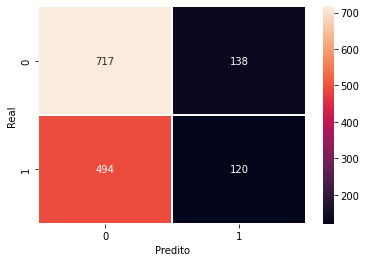

In [244]:
from sklearn.tree import DecisionTreeClassifier
dtc_teste = DecisionTreeClassifier(criterion='entropy',random_state=123,max_depth=7)
dtc_teste.fit(X_treino, y_treino_winner)
predito_dtc_teste = dtc_teste.predict(X_teste)

predito_dtc_winner =  dtc_teste.predict(X_teste)

matriz_confusao = pd.crosstab(y_teste_winner, predito_dtc_winner, rownames=['Real'], colnames=['Predito'])
sns.heatmap(matriz_confusao, annot=True,fmt='d',linewidths=.5)


In [246]:
from prettytable import PrettyTable


precisao_dtc = round(precision_score(y_teste_winner,predito_dtc_winner)*100,2)
acuracia_dtc = round(accuracy_score(y_teste_winner,predito_dtc_winner)*100,2)
f1Score_dtc = round(f1_score(y_teste_winner,predito_dtc_winner)*100,2)


myTable = PrettyTable(["Algoritmo", "Precisão %", "Acurácia %", "F1-Score %"])
myTable.align = 'r'
myTable.add_row(["DTC",precisao_dtc,acuracia_dtc,f1Score_dtc])

print(myTable)

+-----------+------------+------------+------------+
| Algoritmo | Precisão % | Acurácia % | F1-Score % |
+-----------+------------+------------+------------+
|       DTC |      46.51 |      56.98 |      27.52 |
+-----------+------------+------------+------------+


# O modelo deverá responder as seguintes perguntas:
- Quem vence? 
- Como?
- Em qual round?